# Predicting sed_basin using ML

for NSF Bedclasses


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

import sys
sys.path.append("/Users/dporter/Documents/Research/Projects/bedclass")


In [2]:
from matplotlib import rc,rcParams

# rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


## Read in sampled line (from Borthwick)

In [3]:
# Determine where to look #
# basedir = 'data'
basedir = '/Users/dporter/Documents/Research/Projects/bedclass/'



In [4]:
datadir = 'data'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, datadir, 'upper_thwaites_model_sed_sampled.csv')
df = pd.read_csv(infile)
df

,OBJECTID,freeair_grav,flight_elev,PSX,PSY,sed_basin,classvalue,water,mag,reflectivity,swathradar,roughness,bedmachine,beta,boug
0,1,-23.9,1612.41,-1364786.37,-459059.05,0.0,0,0.003356,-26.531353,None,None,328.596680,-1230.801270,9.728771,25.469545
1,2,-23.78,1615.33,-1365245.70,-459206.70,0.0,0,0.003045,-23.660578,None,None,430.959198,-1226.179688,9.733963,25.681009
2,3,-23.73,1617.36,-1365768.83,-459374.38,0.0,0,0.001919,-21.614716,None,None,492.869568,-1230.083862,9.739579,25.690121
3,4,-23.76,1618.09,-1366225.41,-459519.14,0.0,0,0.004612,-20.870977,None,None,477.412079,-1238.437744,9.744205,25.699177
4,5,-23.82,1618.10,-1366681.29,-459661.62,0.0,0,0.013524,-21.147133,None,None,297.176849,-1251.455200,9.748562,25.709042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,456,-25.96,1835.63,-1241152.49,-438504.10,1.0,1,0.000000,86.761391,None,None,153.182358,-1369.962158,10.141876,22.451939
456,457,-26.51,1835.37,-1241687.53,-438534.21,1.0,1,0.000000,75.139977,None,None,164.807800,-1371.256348,10.122437,22.205278
457,458,-26.99,1835.20,-1242155.35,-438559.96,1.0,1,0.000000,64.975822,None,None,175.672501,-1370.955078,10.105682,21.989605
458,459,-27.43,1835.21,-1242622.77,-438585.38,1.0,1,0.000000,54.757145,None,None,187.959457,-1369.822388,10.097807,21.774118


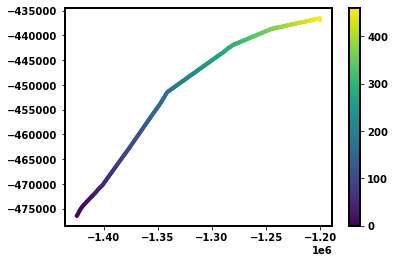

In [5]:
# plt.plot(df.sort_values(by=['PSX'], ascending=True).PSX, ls='', marker='.')

df = df.sort_values(by=['PSX'], ascending=True).reset_index()
plt.scatter(df.PSX, df.PSY, c=df.index, marker='.')
# plt.scatter(df.sort_values(by=['PSX'], ascending=True).PSX, df.sort_values(by=['PSX'], ascending=True).PSY, c=df.OBJECTID, marker='.')
plt.colorbar()

<AxesSubplot:>

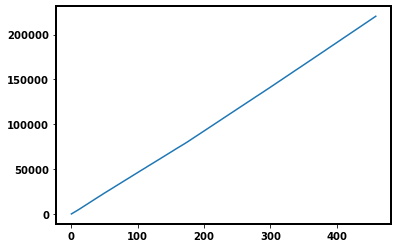

In [14]:
from bedclass.custom_funcs import calc_dist_projected

df = calc_dist_projected(df, 'PSX', 'PSY')
df['Dist'].plot()

## Plot samples UTG line

In [15]:
# df.dtypes
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

### Find basin edges

In [16]:
df['classvalue'].iloc[0] = df['classvalue'].iloc[1]
df['sed_basin'].iloc[0] = df['sed_basin'].iloc[1]

In [17]:
print(df[df['classvalue'].diff() != 0].index.tolist())
print(df['Dist'].iloc[df[df['classvalue'].diff() != 0].index.tolist()]/1e3)


# df.iloc[df[df['classvalue'].diff() != 0].index.tolist()]

[0, 46, 72, 157, 204, 266, 299, 325, 339, 364, 385]
0        0.000000
46      21.413280
72      33.370376
157     72.159683
204     94.453439
266    124.739793
299    140.824663
325    153.704049
339    160.656703
364    173.037721
385    183.531670
Name: Dist, dtype: float64


In [18]:
def add_basin_locs():
    ax.axvspan(21.4, 33.3, alpha=0.5, color='goldenrod')
    ax.axvspan(72.15, 94.45, alpha=0.5, color='goldenrod')
    ax.axvspan(124.73, 140.82, alpha=0.5, color='goldenrod')
    ax.axvspan(153.70, 160.65, alpha=0.5, color='goldenrod')
    ax.axvspan(173.03, 183.53, alpha=0.5, color='goldenrod')

### Plot profiles

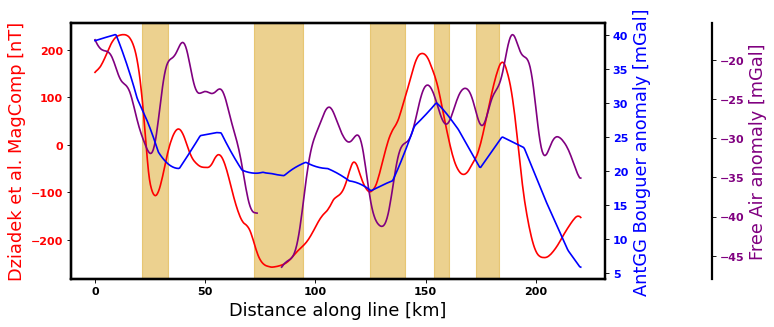

In [19]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(df['Dist']/1e3, df['mag'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Dziadek et al. MagComp [nT]', color='red', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
# plt.axvline(x=27, color="goldenrod", linestyle="--")
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['Dist']/1e3, df['freeair_grav'], color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('Free Air anomaly [mGal]', color='purple', fontsize=16)
ax2.spines['right'].set_position(('axes', 1.2))

ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['boug'], color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylabel('AntGG Bouguer anomaly [mGal]', color='blue', fontsize=16)


plt.tight_layout()
plt.savefig('figs/lineplot_UTG_sample_potfields.png')

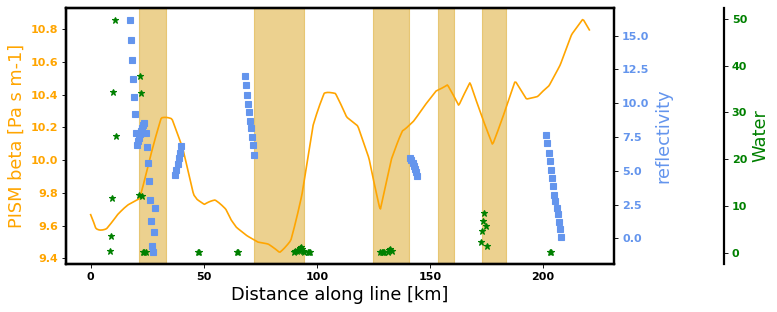

In [20]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)


ax.plot(df['Dist']/1e3, df['beta'], color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('PISM beta [Pa s m-1]', color='orange', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()



ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['reflectivity'], color='cornflowerblue', ls='', marker='s')
ax3.tick_params(axis='y', labelcolor='cornflowerblue')
ax3.set_ylabel('reflectivity', color='cornflowerblue', fontsize=16)

ax4 = ax.twinx()
ax4.plot(df['Dist'].loc[df['water'] >= 0.1]/1e3, df['water'].loc[df['water'] >= 0.1], color='green', ls='', marker='*')
ax4.tick_params(axis='y', labelcolor='green')
ax4.set_ylabel('Water', color='green', fontsize=16)
ax4.spines['right'].set_position(('axes', 1.2))


plt.tight_layout()
plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')

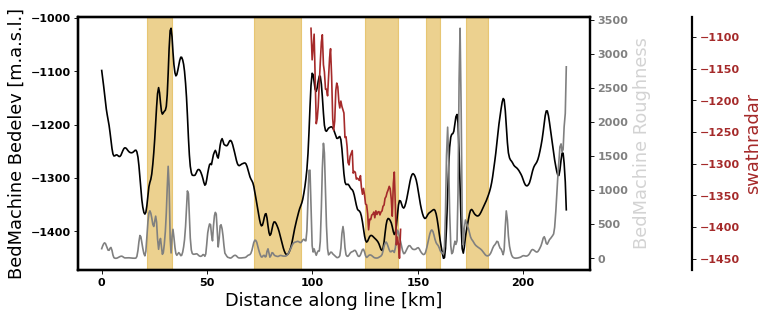

In [21]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(df['Dist']/1e3, df['bedmachine'], color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylabel('BedMachine Bedelev [m.a.s.l.]', color='black', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['Dist']/1e3, df['roughness'], 
         color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
ax2.set_ylabel('BedMachine Roughness', color='lightgrey', fontsize=16)

ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['swathradar'], 
         color='brown')
ax3.tick_params(axis='y', labelcolor='brown')
ax3.set_ylabel('swathradar', color='brown', fontsize=16)
ax3.spines['right'].set_position(('axes', 1.2))

plt.tight_layout()
plt.savefig('figs/lineplot_borthwickmuto_sample_BedMachine.pdf')

# Tensor Flow 

(for another time)

In [186]:
# from tensorflow import keras


# Scikit-learn

## Prepare data set

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [71]:
# #split dataset in features and target variable
feature_cols = ['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']
target_col = ['classvalue']
model_cols = feature_cols + target_col


In [17]:
df_train = df.copy()
df_train = df_train[model_cols]
df_train[target_col] = df_train[target_col].astype('int')

### scale

In [30]:
sc = StandardScaler()

df_scaled = df_train.copy()
df_scaled[feature_cols] = sc.fit_transform(df_train[feature_cols])

# temp = sc.fit_transform(df_train)
# df_scaled = pd.DataFrame(temp, index=df_train.index, columns=df_train.columns)

### split

In [32]:
#Splitting the dataset into  training and validation sets
training_set, validation_set = train_test_split(df_scaled, test_size = 0.2, random_state = 21)

In [33]:
#classifying the predictors and target variables as X and Y
# X_train = training_set.iloc[:,0:-1].values
# Y_train = training_set.iloc[:,-1].values
# X_val = validation_set.iloc[:,0:-1].values
# y_val = validation_set.iloc[:,-1].values

X_train = training_set[feature_cols].values
y_train = training_set[target_col].values
X_test = validation_set[feature_cols].values
y_test = validation_set[target_col].values

### create some raw X and y that contain full set of feature and target data

In [105]:
# X = df[feature_cols] # Features
# y = df['classvalue'] # Target variable
X = df_scaled[feature_cols].values
y = df_scaled[target_col].astype('int').values.squeeze()

## Yellowbrick for visualization

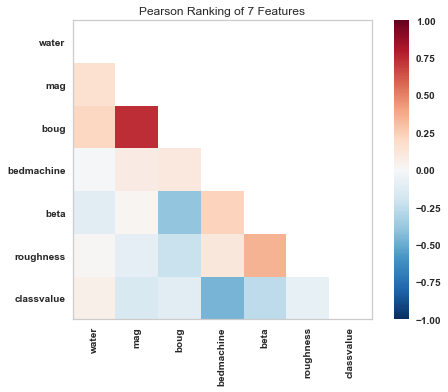

<AxesSubplot:title={'center':'Pearson Ranking of 7 Features'}>

In [35]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df_scaled)  # training_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
visualizer.show()

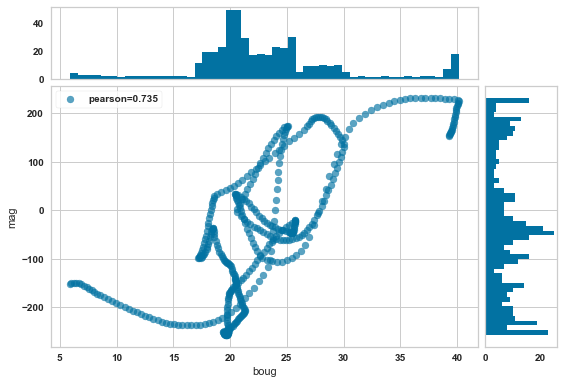

<AxesSubplot:xlabel='boug', ylabel='mag'>

In [36]:
from yellowbrick.features import JointPlotVisualizer


visualizer = JointPlotVisualizer(columns=['boug', 'mag'])
visualizer.fit_transform(df_train, df_train[target_col].values)
visualizer.show()

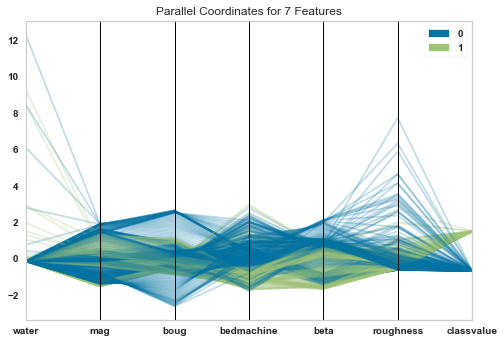

In [104]:
from yellowbrick.features import parallel_coordinates

# visualizer = parallel_coordinates(df_scaled, y, normalize="standard")
visualizer = parallel_coordinates(df_scaled, df_scaled[target_col].values.squeeze(), normalize="standard")

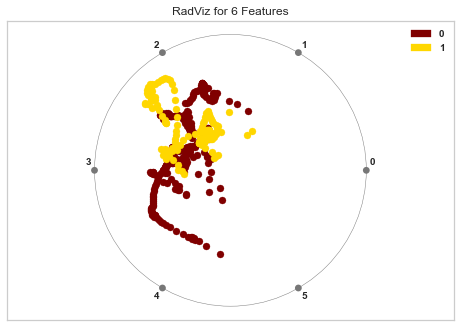

In [70]:
from yellowbrick.features import radviz

visualizer = radviz(X, y, colors=["maroon", "gold"])

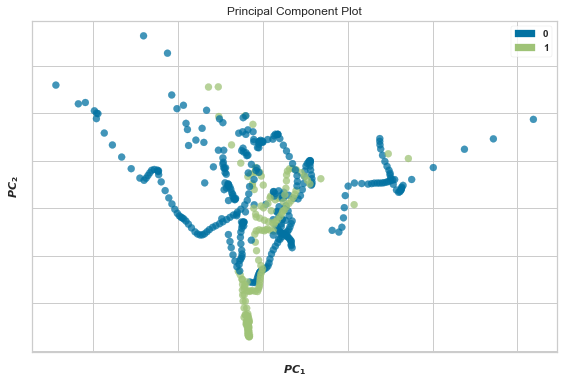

In [72]:
from yellowbrick.features import pca_decomposition

visualizer = pca_decomposition(X, y)

## GaussianNB

In [74]:
# #Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(), alpha = 0,  # =(150,100,50) 
                           max_iter=300, 
                           activation = 'relu', 
                           solver='lbfgs',  # 'lbfgs' 'adam'
                           random_state=1)

# classifier = GaussianNB()

### fit to training data

In [75]:
#Fitting the training data to the network
classifier.fit(X_train, y_train)

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0, hidden_layer_sizes=(), max_iter=300, random_state=1,
              solver='lbfgs')

### predict y_pred for X_test input

In [76]:
#Predicting y for X_val
y_pred = classifier.predict(X_test)

### Calculating the accuracy of predictions

In [77]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [78]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print(f"Accuracy of MLPClassifier : {accuracy(cm)}")

Accuracy of MLPClassifier : 0.7608695652173914


## Classification Report

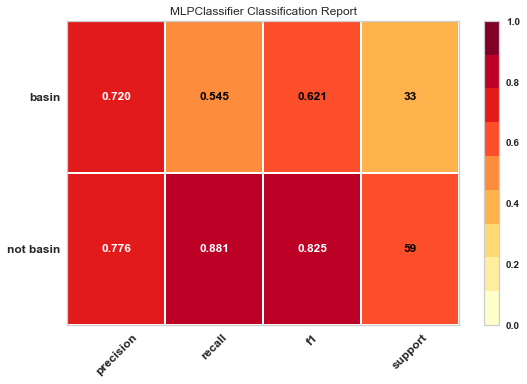

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [79]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
# model = GaussianNB()
visualizer = ClassificationReport(classifier, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/yellowbrick/base.py:236: YellowbrickWarning: Rank2D does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(


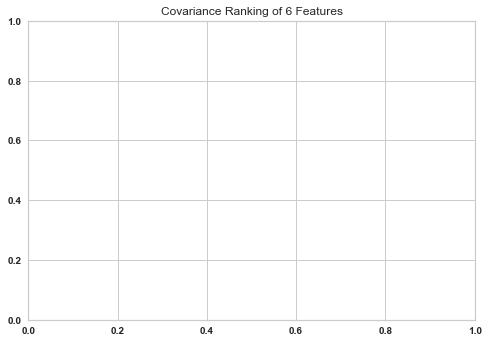

<AxesSubplot:title={'center':'Covariance Ranking of 6 Features'}>

In [82]:
visualizer = Rank2D(
    features=feature_cols, algorithm='covariance'
)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

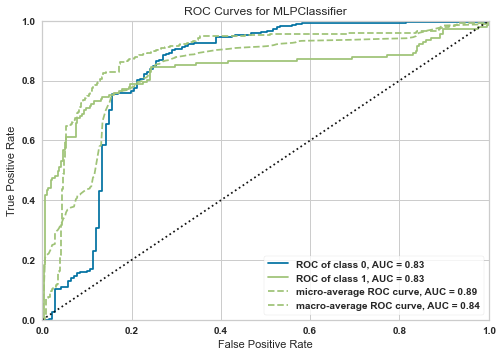

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ROCAUC

# model = LinearSVC()
# visualizer = ROCAUC(model, iterations=500, binary=True)

visualizer = ROCAUC(classifier)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()


## `MLPClassifier` example from scikitlearn docs

In [49]:
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
#                                                     random_state=1)

clf = MLPClassifier(random_state=1, 
                    max_iter=500)
clf.fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
print(clf.score(X_test, y_test))

visualizer = ClassificationReport(clf, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9456521739130435


/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'ClassificationReport' is not defined

In [ ]:
visualizer = ROCAUC(clf)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

## Perceptron

In [142]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

coeffs = clf.coef_

for cid, c in enumerate(df_train[feature_cols].columns):
    print(f"{c:12}: {coeffs[0, cid]:5.2f}")

water       : -4.21
mag         :  0.74
boug        :  0.18
bedmachine  : -3.90
beta        : -0.41
roughness   :  0.98


/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


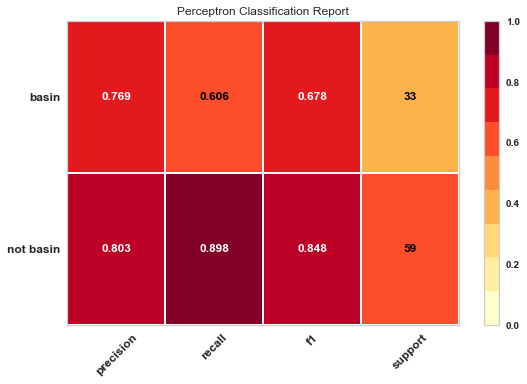

<AxesSubplot:title={'center':'Perceptron Classification Report'}>

In [143]:
visualizer = ClassificationReport(clf, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

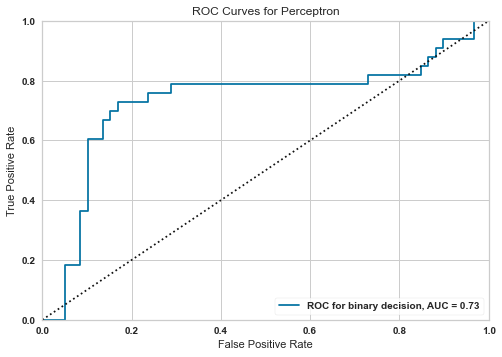

<AxesSubplot:title={'center':'ROC Curves for Perceptron'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [145]:
visualizer = ROCAUC(clf, binary=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Logistic Regression

### NOT scaling

In [432]:
# #Splitting the dataset into  training and validation sets
# training_set, validation_set = train_test_split(df_train, test_size = 0.5, random_state = 21)

# X_train = training_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
# y_train = training_set['classvalue'].values
# X_test = validation_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
# y_test = validation_set['classvalue'].values

### build logistic regression model

In [146]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print(f"Accuracy of LogisticRegression : {accuracy(cm)}")

Accuracy of LogisticRegression : 0.7717391304347826


## Plot predictions vs Borthwicks classes

have to map Y_pred back onto df?

In [ ]:
# # keep location where tests and training data were
# # y_test from the split_train function
# y_test['preds'] = y_hats

# df_out = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)

In [84]:
y_hats = clf.predict(df_scaled[feature_cols].values)

In [85]:
df['y_pred'] = y_hats

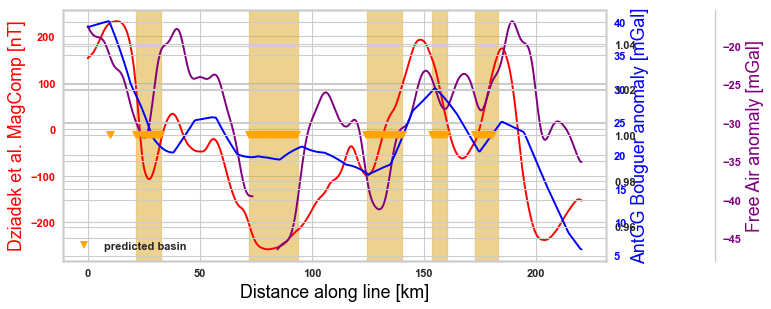

In [86]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(df['Dist']/1e3, df['mag'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Dziadek et al. MagComp [nT]', color='red', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
# plt.axvline(x=27, color="goldenrod", linestyle="--")
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['Dist']/1e3, df['freeair_grav'], color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('Free Air anomaly [mGal]', color='purple', fontsize=16)
ax2.spines['right'].set_position(('axes', 1.2))

ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['boug'], color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylabel('AntGG Bouguer anomaly [mGal]', color='blue', fontsize=16)

ax4 = ax.twinx()
ax4.plot(df['Dist'].loc[df['y_pred'] == 1]/1e3, df['y_pred'].loc[df['y_pred'] == 1], color='orange', ls='', marker='v', label='predicted basin')
# ax4.set_ylim([1, 2])
# frame1 = plt.gca()
# frame1.axes.get_yaxis().set_visible(False)
# plt.text(0, 0.95, r'$\mu=100,\ \sigma=15$')

plt.legend(loc='lower left', facecolor='white')  # bounding_box=True , framealpha=0
plt.tight_layout()
# plt.savefig('figs/lineplot_UTG_sample_potfields_ypred.png')

# Predict `sed_basin` for all of ASE



## Read in full ASE grid



In [87]:
infile_ASE = os.path.join(basedir, datadir, 'Sample_ASE_antgg3.csv')
df_ASE = pd.read_csv(infile_ASE)
df_ASE

,OID_,bouguer,X,Y,mag,bedmachine,roughness,beta,water,reflectivity
0,1,0,-1.514792e+06,-885843.443294,74.745117,-202.940338,555.278565,9.629051,NaN,NaN
1,2,-7,-1.504814e+06,-885843.443294,75.959213,-316.604279,1083.545898,8.273091,NaN,NaN
2,3,9,-1.494836e+06,-885843.443294,76.630722,-491.640747,499.775726,8.267093,NaN,NaN
3,4,15,-1.484858e+06,-885843.443294,76.763046,-588.088501,99.372833,8.178023,NaN,NaN
4,5,9,-1.474880e+06,-885843.443294,76.241409,-595.802551,14.175851,8.590222,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17097,17098,-30,-8.961570e+05,-277186.292885,230.832794,-629.030212,24.412094,11.650911,0.019699,NaN
17098,17099,-35,-8.961570e+05,-287164.278957,245.687820,-567.839600,55.044155,11.759127,0.000498,NaN
17099,17100,-17,-8.961570e+05,-297142.265029,85.379471,-547.689575,68.780571,11.871427,0.000000,NaN
17100,17101,-16,-9.061350e+05,-357010.181463,-195.256424,-575.401550,13.046901,11.824437,0.087853,NaN


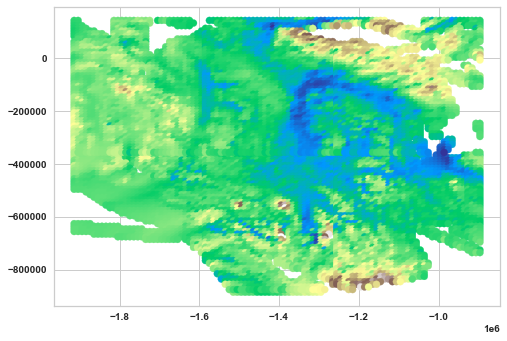

In [88]:
plt.scatter(df_ASE.X, df_ASE.Y, c=df_ASE.bedmachine, cmap="terrain")


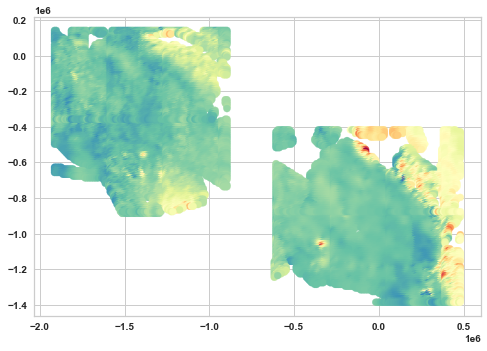

In [89]:
plt.scatter(df_ASE.X, df_ASE.Y, c=df_ASE.bouguer, cmap="Spectral")

## Rename columnes



In [90]:
df_ASE_test = df_ASE.copy()
df_ASE_test.rename({'bouguer': 'boug'}, axis=1, inplace=True)
df_ASE_test = df_ASE_test[feature_cols]

## Scale and fill NaNs



In [91]:
df_ASE_scaled = df_ASE_test.copy()
df_ASE_scaled[feature_cols] = StandardScaler().fit_transform(df_ASE_scaled[feature_cols])

# Fill NA
# df_ASE_scaled['water'] = df_ASE_scaled['water'].fillna(0)
df_ASE_scaled = df_ASE_scaled.fillna(0)



<AxesSubplot:>

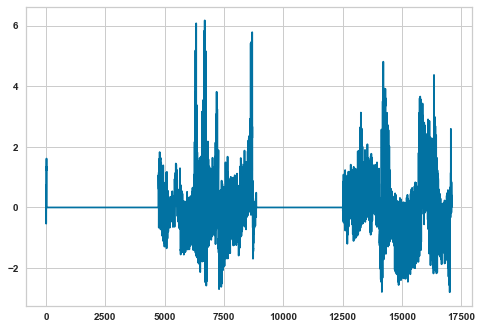

In [92]:
# df_ASE_scaled['bedmachine'].interpolate(method='polynomial', order=2).plot()
df_ASE_scaled['bedmachine'].interpolate(method='linear').plot()

## Predict!



In [93]:
y_pred_ASE = classifier.predict(df_ASE_scaled[feature_cols].values)

### Map the predictions!



In [94]:
from matplotlib.colors import ListedColormap

cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap = ListedColormap(cmap)

(-1000000.0, -0.0)

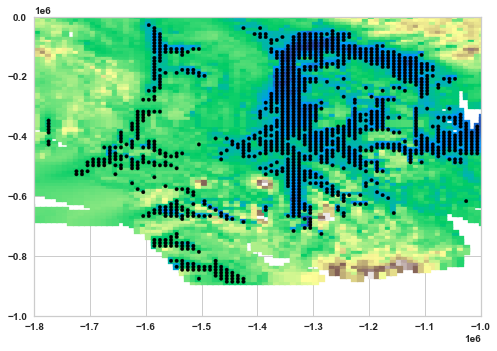

In [95]:

plt.scatter(df_ASE.X, df_ASE.Y, c=df_ASE.bedmachine, 
            marker=',',
            cmap="terrain")
plt.scatter(df_ASE.X, df_ASE.Y, c=y_pred_ASE, 
            marker='.',
            cmap=cmap, edgecolors=None)

plt.xlim(-1.8e6, -1e6)
plt.ylim(-1e6, -0e6)

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [263]:
# from osgeo import ogr
import geopandas as gpd
# import shapefile as shp

# fix PROJ path
projpath = sys.prefix + '/share/proj'
pyproj.datadir.set_data_dir(projpath)

# data/ASE_catchments_matchGL.geojson
# data/ASE_GroundingLine_simple.geojson

outlines = 'data/ASE_catchments+GL_3031.shp'

shapefile = gpd.read_file(outlines)

shapefile.head()

,groundedic,grounded_1,geometry
0,Grounded,GR,"POLYGON ((-1608074.997 -638549.999, -1608123.7..."
1,Grounded,GR,"POLYGON ((-1739481.254 -401608.850, -1740262.4..."
2,Grounded,GR,"POLYGON ((-1609325.000 -722675.000, -1609325.0..."
3,Grounded,GR,"MULTIPOLYGON (((-1604824.996 -612051.692, -160..."
4,Grounded,GR,"POLYGON ((-1908272.291 -410339.703, -1908540.1..."


(-800000.0, -0.0)

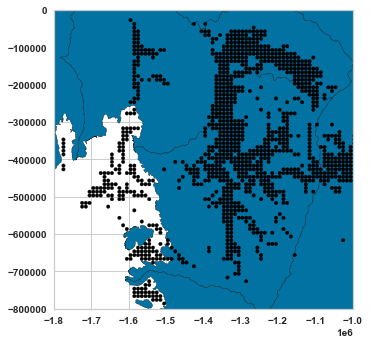

In [278]:
shapefile.plot(color=None, edgecolor='black')  # column='groundedic'

plt.scatter(df_ASE.X, df_ASE.Y, c=y_pred_ASE, 
            marker='.',
            cmap=cmap, edgecolors=None)

plt.xlim(-1.8e6, -1e6)
plt.ylim(-0.8e6, -0e6)


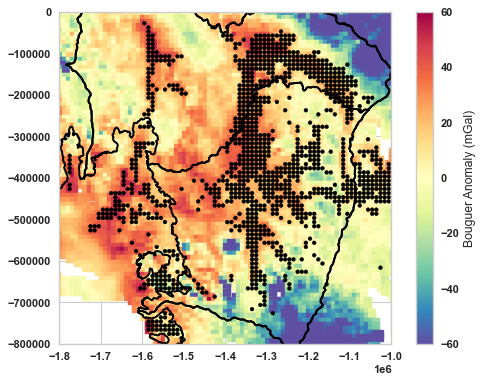

In [277]:
fig, ax = plt.subplots(dpi=80)  # figsize=(8, 8), 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df_ASE.X, df_ASE.Y, c=df_ASE.bouguer, 
            vmin=-60, vmax=60,
            marker=',',
            cmap="Spectral_r")
plt.colorbar(label="Bouguer Anomaly (mGal)")

plt.scatter(df_ASE.X, df_ASE.Y, c=y_pred_ASE, 
            marker='.',
            cmap=cmap, edgecolors=None)

plt.xlim(-1.8e6, -1e6)
plt.ylim(-0.8e6, -0e6)

plt.savefig('figs/mapplot_ASE_ypred_antgg.png')

### Add predictions to dataframe and write to CSV



In [140]:
df_ASE['predicted_class'] = y_pred_ASE

In [150]:
df_ASE.to_csv('data/predict_sed_basin_ASE_logistic.csv')